In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("csvs/hog_95/extracted_features_hog_95.csv",header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3239,3240,3241,3242,3243,3244,3245,3246,3247,3248
0,Rachel_Leigh_Cook,0.101289,1.330157,-0.964354,0.278769,-0.543510,1.725658,-0.641089,-0.416891,-0.197742,...,52.0,689.0,2015.0,543.0,19.0,301.0,450.0,355.0,289.0,11011.0
1,Roseanne_Barr,0.391125,0.704784,1.217563,-0.780129,-1.414380,0.959051,1.196409,1.637598,0.144761,...,44.0,654.0,1721.0,548.0,26.0,416.0,510.0,451.0,378.0,7875.0
2,Vladimir_Putin,-1.246895,-0.680080,0.591671,-2.354134,-1.920589,-0.013368,0.060721,-0.179192,1.438939,...,35.0,504.0,3792.0,564.0,27.0,420.0,679.0,460.0,611.0,17388.0
3,Carlos_Menem,0.597257,-0.661087,1.356273,-0.878202,-0.588220,-0.435263,-0.077499,-0.152108,0.537329,...,53.0,495.0,1593.0,566.0,34.0,343.0,563.0,399.0,338.0,9557.0
4,Lynne_Thigpen,-1.589231,-0.049223,-1.306154,-0.461846,0.250779,-2.198609,-0.026885,0.607296,-0.321626,...,39.0,520.0,1744.0,502.0,24.0,339.0,531.0,398.0,394.0,14844.0


In [42]:
df_test = pd.read_csv("csvs/hog_95/extracted_features_test_hog_95.csv",header=None)
df = pd.concat([df,df_test],axis = 0)

In [43]:
df = df[df[0].map(df[0].value_counts()) >= 70]
X = df.drop(0,axis = 1)
y = df[0]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [44]:
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [45]:
y_pred = model.predict(X_test)
print(accuracy_score(y_pred=y_pred,y_true=y_test))

0.562015503875969


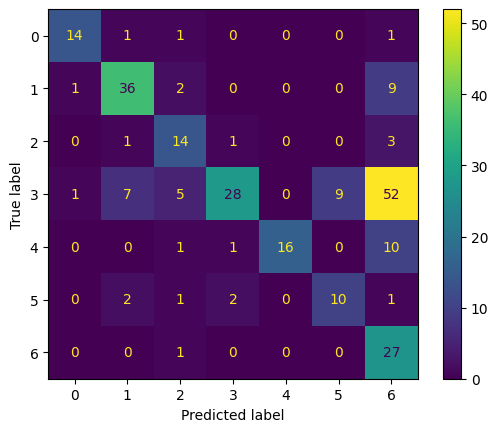

In [47]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred=y_pred,y_true=y_test)).plot()

In [51]:
X_CNN = X.loc[:,946:2993]

In [52]:
X_train_CNN,X_test_CNN,y_train_CNN,y_test_CNN = train_test_split(X_CNN,y,train_size=0.8,random_state=42)

In [53]:
model_CNN = GaussianNB()
model_CNN.fit(X_train_CNN,y_train_CNN)
y_pred = model_CNN.predict(X_test_CNN)
print(accuracy_score(y_pred=y_pred,y_true=y_test_CNN))

0.4069767441860465


In [57]:
print(classification_report(y_pred=y_pred,y_true=y_test))

                   precision    recall  f1-score   support

     Ariel_Sharon       0.61      0.65      0.63        17
     Colin_Powell       0.52      0.50      0.51        48
  Donald_Rumsfeld       0.29      0.21      0.24        19
    George_W_Bush       0.54      0.40      0.46       102
Gerhard_Schroeder       0.18      0.07      0.10        28
      Hugo_Chavez       0.32      0.56      0.41        16
       Tony_Blair       0.22      0.50      0.30        28

         accuracy                           0.41       258
        macro avg       0.38      0.41      0.38       258
     weighted avg       0.43      0.41      0.41       258

